#### Задание 1: Для реализованной в методичке модели градиентного бустинга построить графики зависимости ошибки от количества деревьев в ансамбле и от максимальной глубины деревьев. Сделать выводы о зависимости ошибки от этих параметров.
#### Задание 2: (опция). Модифицировать реализованный алгоритм, чтобы получился стохастический градиентный бустинг. Размер подвыборки принять равным 0.5. Сравнить на одном графике кривые изменения ошибки на тестовой выборке в зависимости от числа итераций.
#### Задание 3: (опция). Реализовать алгоритм градиетного бустинга, основанный на реализации решающего дерева из ДЗ4 / методички к уроку 4. Сделать выводы о качестве алгоритма по сравнению с реализацией из п.1.

In [53]:
from sklearn.tree import DecisionTreeRegressor

from sklearn import model_selection

import matplotlib.pyplot as plt

import numpy as np

import random

In [2]:
from sklearn.datasets import load_diabetes
X, y = load_diabetes(return_X_y=True)

In [3]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(
    X, y, test_size=0.25
)

In [4]:
def gb_predict(X, trees_list, coef_list, eta):
    return np.array([sum([eta* coef * alg.predict([x])[0] for alg, coef in zip(trees_list, coef_list)]) for x in X])

In [5]:
def mean_squared_error(y_real, prediction):
    return (sum((y_real - prediction)**2)) / len(y_real)

In [6]:
def bias(y, z):
    return (y - z)

In [7]:
def gb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, coefs, eta):
    
    # Деревья будем записывать в список
    trees = []
    
    # Будем записывать ошибки на обучающей и тестовой выборке на каждой итерации в список
    train_errors = []
    test_errors = []
    max_depth_list = []
    
    for i in range(n_trees):
        tree = DecisionTreeRegressor(max_depth=max_depth, random_state=42)

        # инициализируем бустинг начальным алгоритмом, возвращающим ноль, 
        # поэтому первый алгоритм просто обучаем на выборке и добавляем в список
        if len(trees) == 0:
            # обучаем первое дерево на обучающей выборке
            tree.fit(X_train, y_train)
            
            train_errors.append(mean_squared_error(y_train, gb_predict(X_train, trees, coefs, eta)))
            test_errors.append(mean_squared_error(y_test, gb_predict(X_test, trees, coefs, eta)))
            max_depth_list.append(max_depth)
        else:
            # Получим ответы на текущей композиции
            y_pred = gb_predict(X_train, trees, coefs, eta)
            target = bias(y_train, y_pred)
            
            # алгоритмы начиная со второго обучаем на сдвиг
            tree.fit(X_train, target)
            
            train_errors.append(mean_squared_error(y_train, gb_predict(X_train, trees, coefs, eta)))
            test_errors.append(mean_squared_error(y_test, gb_predict(X_test, trees, coefs, eta)))
            max_depth_list.append(max_depth)

        trees.append(tree)

    return trees, train_errors, test_errors, max_depth_list

In [8]:
# Число деревьев в ансамбле
n_trees = 10

# для простоты примем коэффициенты равными 1
coefs = [1] * n_trees

# Максимальная глубина деревьев
max_depth = 3

# Шаг
eta = 1

trees, train_errors, test_errors, max_depth_list = gb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, coefs, eta)

In [9]:
def evaluate_alg(X_train, X_test, y_train, y_test, trees, coefs, eta):
    train_prediction = gb_predict(X_train, trees, coefs, eta)

    print(f'Ошибка алгоритма из {n_trees} деревьев глубиной {max_depth} \
    с шагом {eta} на тренировочной выборке: {mean_squared_error(y_train, train_prediction)}')

    test_prediction = gb_predict(X_test, trees, coefs, eta)

    print(f'Ошибка алгоритма из {n_trees} деревьев глубиной {max_depth} \
    с шагом {eta} на тестовой выборке: {mean_squared_error(y_test, test_prediction)}')

In [10]:
np.mean(y_train), np.mean(y_test)

(153.16616314199396, 149.05405405405406)

In [11]:
evaluate_alg(X_train, X_test, y_train, y_test, trees, coefs, eta)

Ошибка алгоритма из 10 деревьев глубиной 3     с шагом 1 на тренировочной выборке: 1187.6629645002931
Ошибка алгоритма из 10 деревьев глубиной 3     с шагом 1 на тестовой выборке: 4468.25414097369


In [27]:
def get_error_plot(n_trees, train_err, test_err, max_depth):
    plt.xlabel(f'Number of trees = {n_trees}, max_depth = {max_depth}')
    plt.ylabel('MSE')
    plt.xlim(0, n_trees)
    plt.plot(list(range(n_trees)), train_err, label='train error')
    plt.plot(list(range(n_trees)), test_err, label='test error')
    plt.legend(loc='upper right')
    plt.show()

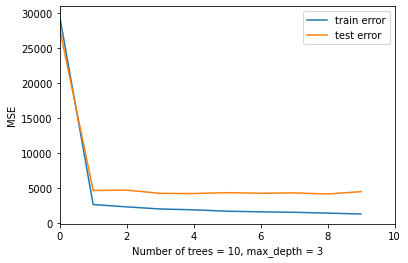

In [28]:
get_error_plot(n_trees, train_errors, test_errors, max_depth)

In [18]:
def get_error_plot_tree_depth(max_depth_list, train_err, test_err):
    plt.xlabel('Tree Depth')
    plt.ylabel('MSE')
    plt.xlim(0, max_depth_list)
    plt.plot(max_depth_list, train_err, label='train error')
    plt.plot(max_depth_list, test_err, label='test error')
    plt.legend(loc='upper right')
    plt.show()

Ошибка алгоритма из 20 деревьев глубиной 5     с шагом 1 на тренировочной выборке: 5.674101962747092
Ошибка алгоритма из 20 деревьев глубиной 5     с шагом 1 на тестовой выборке: 6451.643993961566


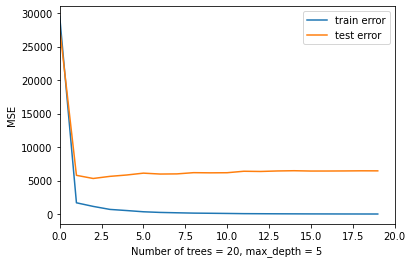

In [29]:
n_trees = 20

coefs = [1] * n_trees

max_depth = 5

eta = 1

trees, train_errors, test_errors, max_depth_list = gb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, coefs, eta)

evaluate_alg(X_train, X_test, y_train, y_test, trees, coefs, eta)

get_error_plot(n_trees, train_errors, test_errors, max_depth)


Ошибка алгоритма из 15 деревьев глубиной 4     с шагом 0.5 на тренировочной выборке: 391.3054872339392
Ошибка алгоритма из 15 деревьев глубиной 4     с шагом 0.5 на тестовой выборке: 4687.709356405614


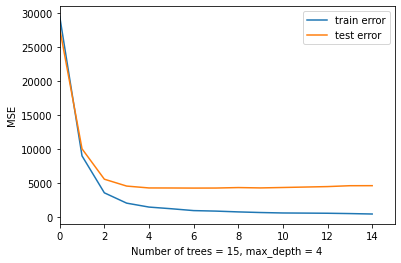

In [30]:
n_trees = 15

coefs = [1] * n_trees

max_depth = 4

eta = 0.5

trees, train_errors, test_errors, max_depth_list = gb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, coefs, eta)

evaluate_alg(X_train, X_test, y_train, y_test, trees, coefs, eta)

get_error_plot(n_trees, train_errors, test_errors, max_depth)

Ошибка алгоритма из 30 деревьев глубиной 4     с шагом 1 на тренировочной выборке: 14.161340779564952
Ошибка алгоритма из 30 деревьев глубиной 4     с шагом 1 на тестовой выборке: 6310.3523720782305


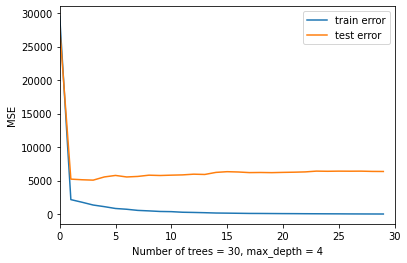

In [32]:
n_trees = 30

coefs = [1] * n_trees

max_depth = 4

eta = 1

trees, train_errors, test_errors, max_depth_list = gb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, coefs, eta)

evaluate_alg(X_train, X_test, y_train, y_test, trees, coefs, eta)

get_error_plot(n_trees, train_errors, test_errors, max_depth)

Ошибка алгоритма из 30 деревьев глубиной 5     с шагом 1 на тренировочной выборке: 0.3179991233901947
Ошибка алгоритма из 30 деревьев глубиной 5     с шагом 1 на тестовой выборке: 6441.108168603483


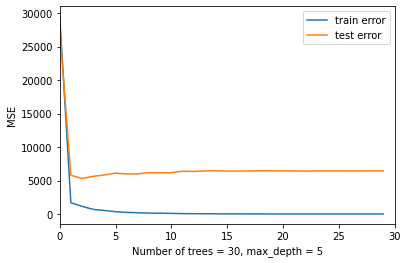

In [33]:
n_trees = 30

coefs = [1] * n_trees

max_depth = 5

eta = 1

trees, train_errors, test_errors, max_depth_list = gb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, coefs, eta)

evaluate_alg(X_train, X_test, y_train, y_test, trees, coefs, eta)

get_error_plot(n_trees, train_errors, test_errors, max_depth)

Ошибка алгоритма из 30 деревьев глубиной 3     с шагом 1 на тренировочной выборке: 269.5072272415944
Ошибка алгоритма из 30 деревьев глубиной 3     с шагом 1 на тестовой выборке: 5614.217150667811


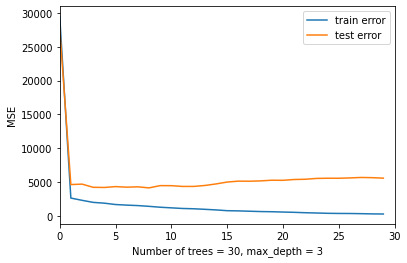

In [34]:
n_trees = 30

coefs = [1] * n_trees

max_depth = 3

eta = 1

trees, train_errors, test_errors, max_depth_list = gb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, coefs, eta)

evaluate_alg(X_train, X_test, y_train, y_test, trees, coefs, eta)

get_error_plot(n_trees, train_errors, test_errors, max_depth)

Ошибка алгоритма из 50 деревьев глубиной 3     с шагом 1 на тренировочной выборке: 66.6282337615291
Ошибка алгоритма из 50 деревьев глубиной 3     с шагом 1 на тестовой выборке: 5731.559431262539


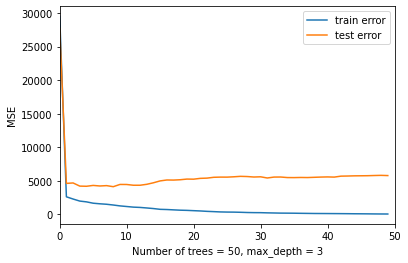

In [35]:
n_trees = 50

coefs = [1] * n_trees

max_depth = 3

eta = 1

trees, train_errors, test_errors, max_depth_list = gb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, coefs, eta)

evaluate_alg(X_train, X_test, y_train, y_test, trees, coefs, eta)

get_error_plot(n_trees, train_errors, test_errors, max_depth)

Ошибка алгоритма из 100 деревьев глубиной 3     с шагом 1 на тренировочной выборке: 1.0087245935741078
Ошибка алгоритма из 100 деревьев глубиной 3     с шагом 1 на тестовой выборке: 5882.544580348047


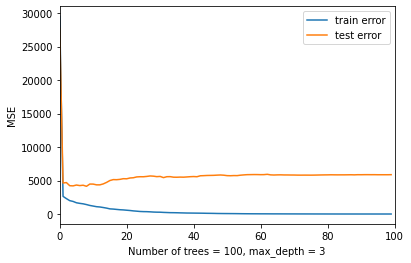

In [36]:
n_trees = 100

coefs = [1] * n_trees

max_depth = 3

eta = 1

trees, train_errors, test_errors, max_depth_list = gb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, coefs, eta)

evaluate_alg(X_train, X_test, y_train, y_test, trees, coefs, eta)

get_error_plot(n_trees, train_errors, test_errors, max_depth)

Ошибка алгоритма из 20 деревьев глубиной 3     с шагом 0.25 на тренировочной выборке: 1292.0841529635977
Ошибка алгоритма из 20 деревьев глубиной 3     с шагом 0.25 на тестовой выборке: 3654.9273671650026


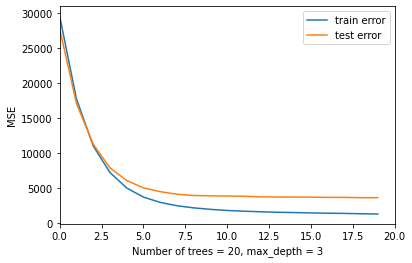

In [38]:
n_trees = 20

coefs = [1] * n_trees

max_depth = 3

eta = 0.25

trees, train_errors, test_errors, max_depth_list = gb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, coefs, eta)

evaluate_alg(X_train, X_test, y_train, y_test, trees, coefs, eta)

get_error_plot(n_trees, train_errors, test_errors, max_depth)

Ошибка алгоритма из 20 деревьев глубиной 3     с шагом 0.2 на тренировочной выборке: 1445.4823603459013
Ошибка алгоритма из 20 деревьев глубиной 3     с шагом 0.2 на тестовой выборке: 3639.6750946239576


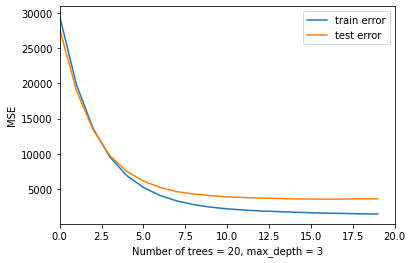

In [43]:
n_trees = 20

coefs = [1] * n_trees

max_depth = 3

eta = 0.2

trees, train_errors, test_errors, max_depth_list = gb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, coefs, eta)

evaluate_alg(X_train, X_test, y_train, y_test, trees, coefs, eta)

get_error_plot(n_trees, train_errors, test_errors, max_depth)

Ошибка алгоритма из 15 деревьев глубиной 3     с шагом 0.2 на тренировочной выборке: 1675.4845896339327
Ошибка алгоритма из 15 деревьев глубиной 3     с шагом 0.2 на тестовой выборке: 3615.9116215133454


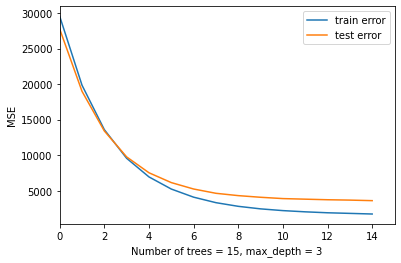

In [44]:
n_trees = 15

coefs = [1] * n_trees

max_depth = 3

eta = 0.2

trees, train_errors, test_errors, max_depth_list = gb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, coefs, eta)

evaluate_alg(X_train, X_test, y_train, y_test, trees, coefs, eta)

get_error_plot(n_trees, train_errors, test_errors, max_depth)

Выводы такие могу сделать. Наименьший эффект переобученности возникает на неглубокой глубине деревьев - 3 дерева. На небольшом количестве алгоритмов - 15-20, а также на небольшом шаге 0.2 - 0.25

In [90]:
# создам функцию для генерации случайных подвыборок

def get_subsamples(X, y):
    n_samples = X.shape[0]
    #subsample_X = []
    #subsample_y = []
    
    ind_sub = [i for i in range(n_samples)]
    sample_index_list = np.random.choice(ind_sub, size=int(n_samples/2))
    
    s_data = np.zeros(int(n_samples/2))
    s_labels = np.zeros(int(n_samples/2))
    
    for j in sample_index_list:
        s_data[j] = X[j]
        s_labels[j] = y[j]            
        #subsample_X.append(s_data)
        #subsample_y.append(s_labels)
    
    #return subsample_X, subsample_y
    return s_data, s_labels


In [91]:
s, y = get_subsamples(X_train, y_train)

ValueError: setting an array element with a sequence.

In [87]:
s.shape, y.shape

((331, 10), (331,))

In [78]:
def gb_fit_s(n_trees, max_depth, X_train, X_test, y_train, y_test, coefs, eta):
    
    # Деревья будем записывать в список
    trees = []
    
    # Будем записывать ошибки на обучающей и тестовой выборке на каждой итерации в список
    train_errors = []
    test_errors = []
    max_depth_list = []
    
    for i in range(n_trees):
        tree = DecisionTreeRegressor(max_depth=max_depth, random_state=42)
        
        X_train_sub, y_train_sub = get_subsamples(X_train, y_train)

        # инициализируем бустинг начальным алгоритмом, возвращающим ноль, 
        # поэтому первый алгоритм просто обучаем на выборке и добавляем в список
        if len(trees) == 0:
            # обучаем первое дерево на обучающей выборке
            tree.fit(X_train_sub, y_train_sub)
            
            train_errors.append(mean_squared_error(y_train_sub, gb_predict(X_train_sub, trees, coefs, eta)))
            test_errors.append(mean_squared_error(y_test, gb_predict(X_test, trees, coefs, eta)))
            max_depth_list.append(max_depth)
        else:
            # Получим ответы на текущей композиции
            y_pred = gb_predict(X_train_sub, trees, coefs, eta)
            target = bias(y_train_sub, y_pred)
            
            # алгоритмы начиная со второго обучаем на сдвиг
            tree.fit(X_train_sub, target)
            
            train_errors.append(mean_squared_error(y_train_sub, gb_predict(X_train_sub, trees, coefs, eta)))
            test_errors.append(mean_squared_error(y_test, gb_predict(X_test, trees, coefs, eta)))
            max_depth_list.append(max_depth)

        trees.append(tree)

    return trees, train_errors, test_errors, max_depth_list

In [76]:
n_trees = 15

coefs = [1] * n_trees

max_depth = 3

eta = 0.2

trees, train_errors, test_errors, max_depth_list = gb_fit_s(n_trees, max_depth, X_train, X_test, y_train, y_test, coefs, eta)

evaluate_alg(X_train, X_test, y_train, y_test, trees, coefs, eta)

get_error_plot(n_trees, train_errors, test_errors, max_depth)

ValueError: operands could not be broadcast together with shapes (165,331) (165,) 